Импортируем все необходимые модули

In [198]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, make_scorer
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

## Часть 0

ЗДЕСЬ ОПИСАНИЕ ЗАДАЧИ

Зададим список переменных согласно документации к данным и считаем их в pandas dataframe объект

In [5]:
columns = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash', 'magnesium', 'total_phenols', 
           'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 
           'hue', 'od_diluted_wines', 'proline']
df = pd.read_csv('wine.csv', header=None, names=columns, delimiter=',', decimal='.')
df.head()

,target,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Сгруппируем все наблюдения по уровням целевой переменной и выведем базовые статистики

In [9]:
byclass = df.groupby('target')
byclass.describe()

alcalinity_ash    alcohol        ash  color_intensity  \
target                                                                
1      count       59.000000  59.000000  59.000000        59.000000   
       mean        17.037288  13.744746   2.455593         5.528305   
       std          2.546322   0.462125   0.227166         1.238573   
       min         11.200000  12.850000   2.040000         3.520000   
       25%         16.000000  13.400000   2.295000         4.550000   
       50%         16.800000  13.750000   2.440000         5.400000   
       75%         18.700000  14.100000   2.615000         6.225000   
       max         25.000000  14.830000   3.220000         8.900000   
2      count       71.000000  71.000000  71.000000        71.000000   
       mean        20.238028  12.278732   2.244789         3.086620   
       std          3.349770   0.537964   0.315467         0.924929   
       min         10.600000  11.030000   1.360000         1.280000   
       25%         18.000000  11.915000   2.000000         2.535000   
       50%         20.000000  12.290000   2.240000         2.900000   
       75%         22.000000  12.515000   2.420000         3.400000   
       max         30.000000  13.860000   3.230000         6.000000   
3      count       48.000000  48.000000  48.000000        48.000000   
       mean        21.416667  13.153750   2.437083         7.396250   
       std          2.258161   0.530241   0.184690         2.310942   
       min         17.500000  12.200000   2.100000         3.850000   
       25%         20.000000  12.805000   2.300000         5.437500   
       50%         21.000000  13.165000   2.380000         7.550000   
       75%         23.000000  13.505000   2.602500         9.225000   
       max         27.000000  14.340000   2.860000        13.000000   

              flavanoids        hue   magnesium  malic_acid  \
target                                                        
1      count   59.000000  59.000000   59.000000   59.000000   
       mean     2.982373   1.062034  106.338983    2.010678   
       std      0.397494   0.116483   10.498949    0.688549   
       min      2.190000   0.820000   89.000000    1.350000   
       25%      2.680000   0.995000   98.000000    1.665000   
       50%      2.980000   1.070000  104.000000    1.770000   
       75%      3.245000   1.130000  114.000000    1.935000   
       max      3.930000   1.280000  132.000000    4.040000   
2      count   71.000000  71.000000   71.000000   71.000000   
       mean     2.080845   1.056282   94.549296    1.932676   
       std      0.705701   0.202937   16.753497    1.015569   
       min      0.570000   0.690000   70.000000    0.740000   
       25%      1.605000   0.925000   85.500000    1.270000   
       50%      2.030000   1.040000   88.000000    1.610000   
       75%      2.475000   1.205000   99.500000    2.145000   
       max      5.080000   1.710000  162.000000    5.800000   
3      count   48.000000  48.000000   48.000000   48.000000   
       mean     0.781458   0.682708   99.312500    3.333750   
       std      0.293504   0.114441   10.890473    1.087906   
       min      0.340000   0.480000   80.000000    1.240000   
       25%      0.580000   0.587500   89.750000    2.587500   
       50%      0.685000   0.665000   97.000000    3.265000   
       75%      0.920000   0.752500  106.000000    3.957500   
       max      1.570000   0.960000  123.000000    5.650000   

              nonflavanoid_phenols  od_diluted_wines  proanthocyanins  \
target                                                                  
1      count             59.000000         59.000000        59.000000   
       mean               0.290000          3.157797         1.899322   
       std                0.070049          0.357077         0.412109   
       min                0.170000          2.510000         1.250000   
       25%                0.255000          2.870000         1.640000   
       50%       

Заметим, что имеется небольшой дисбаланс классов в выборке: 59/71/48.
Больше всего информации у нас есть по классу target=2. У некоторых переменных заметны большие значения стандратного отклонения. Возможны выбросы

Построим боксплоты, разбитые по уровням целевой переменной, на предмет предполагаемых экстремальных значений, так как их наличие может серьезно повлиять на SVM и нейронную сеть с архитектурой типа многослойный перцептрон

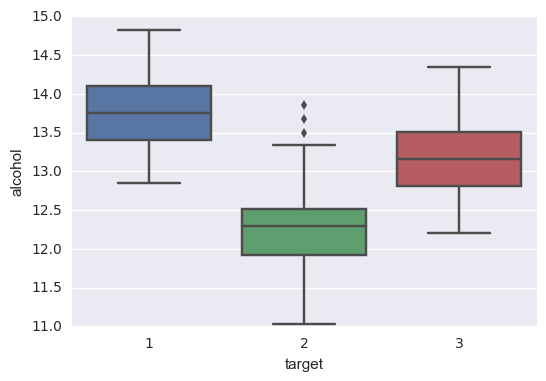

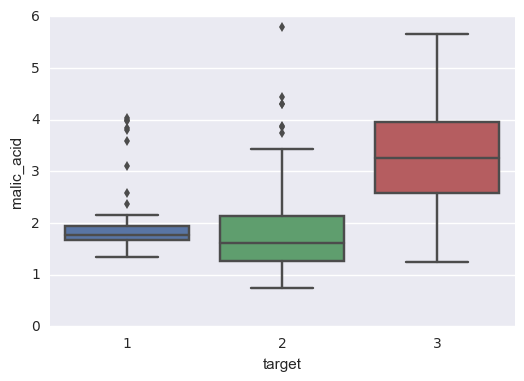

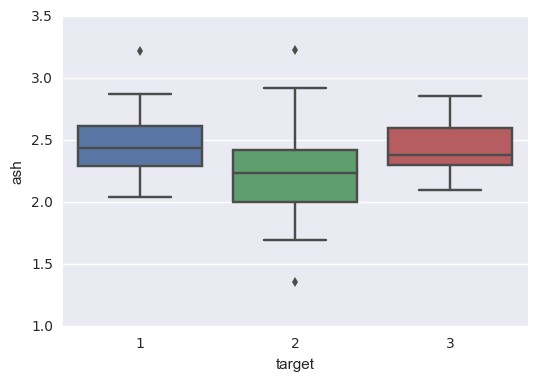

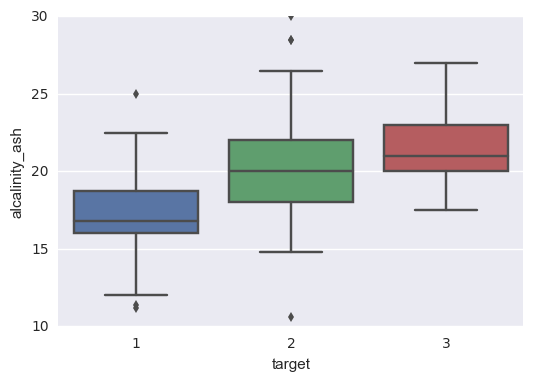

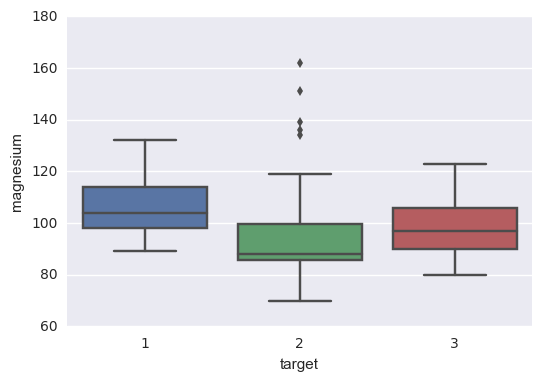

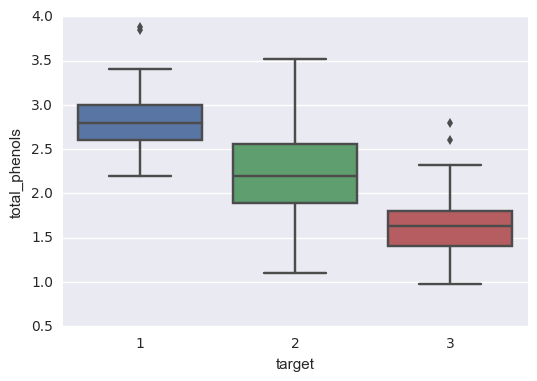

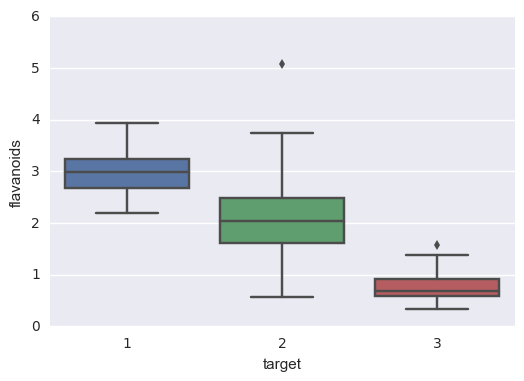

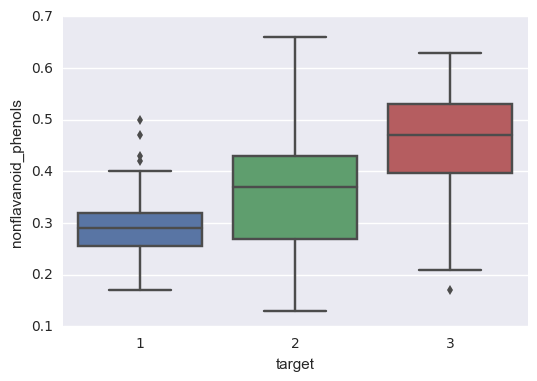

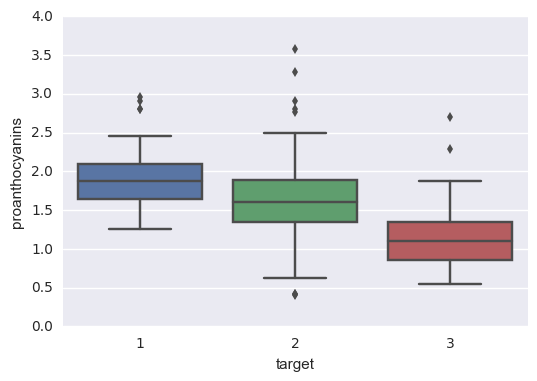

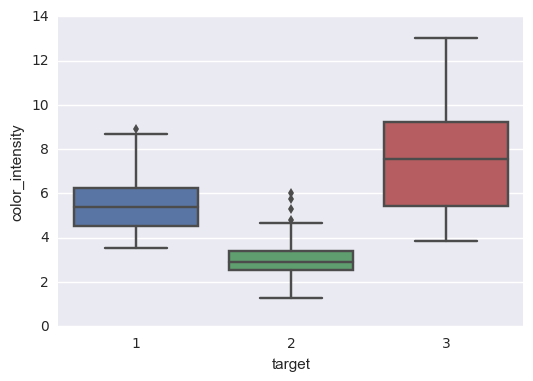

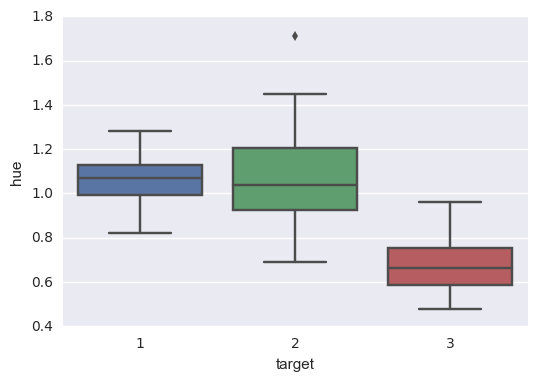

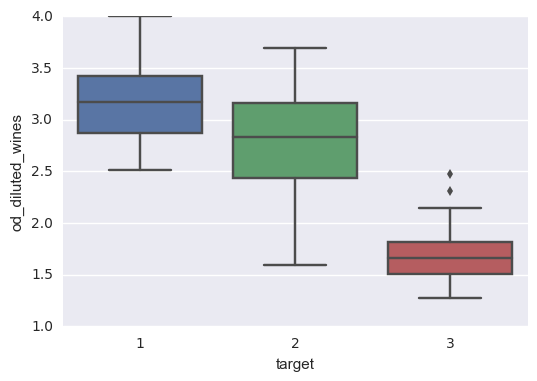

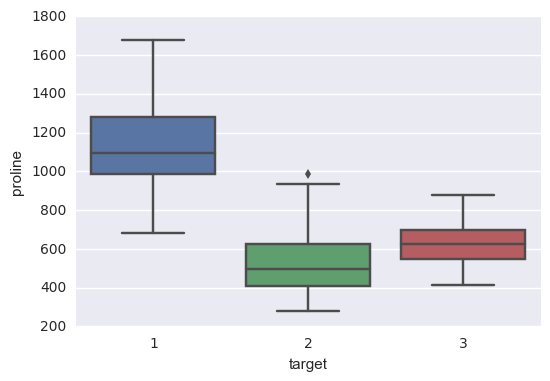

In [26]:
for col in df.columns:
    if col == 'target':
        continue
    plt.figure()
    sns.boxplot(data=df, y = col, x = 'target')
plt.show()

Дальше посмотрим на диаграммы рассеяния на предмет наличия корреляций

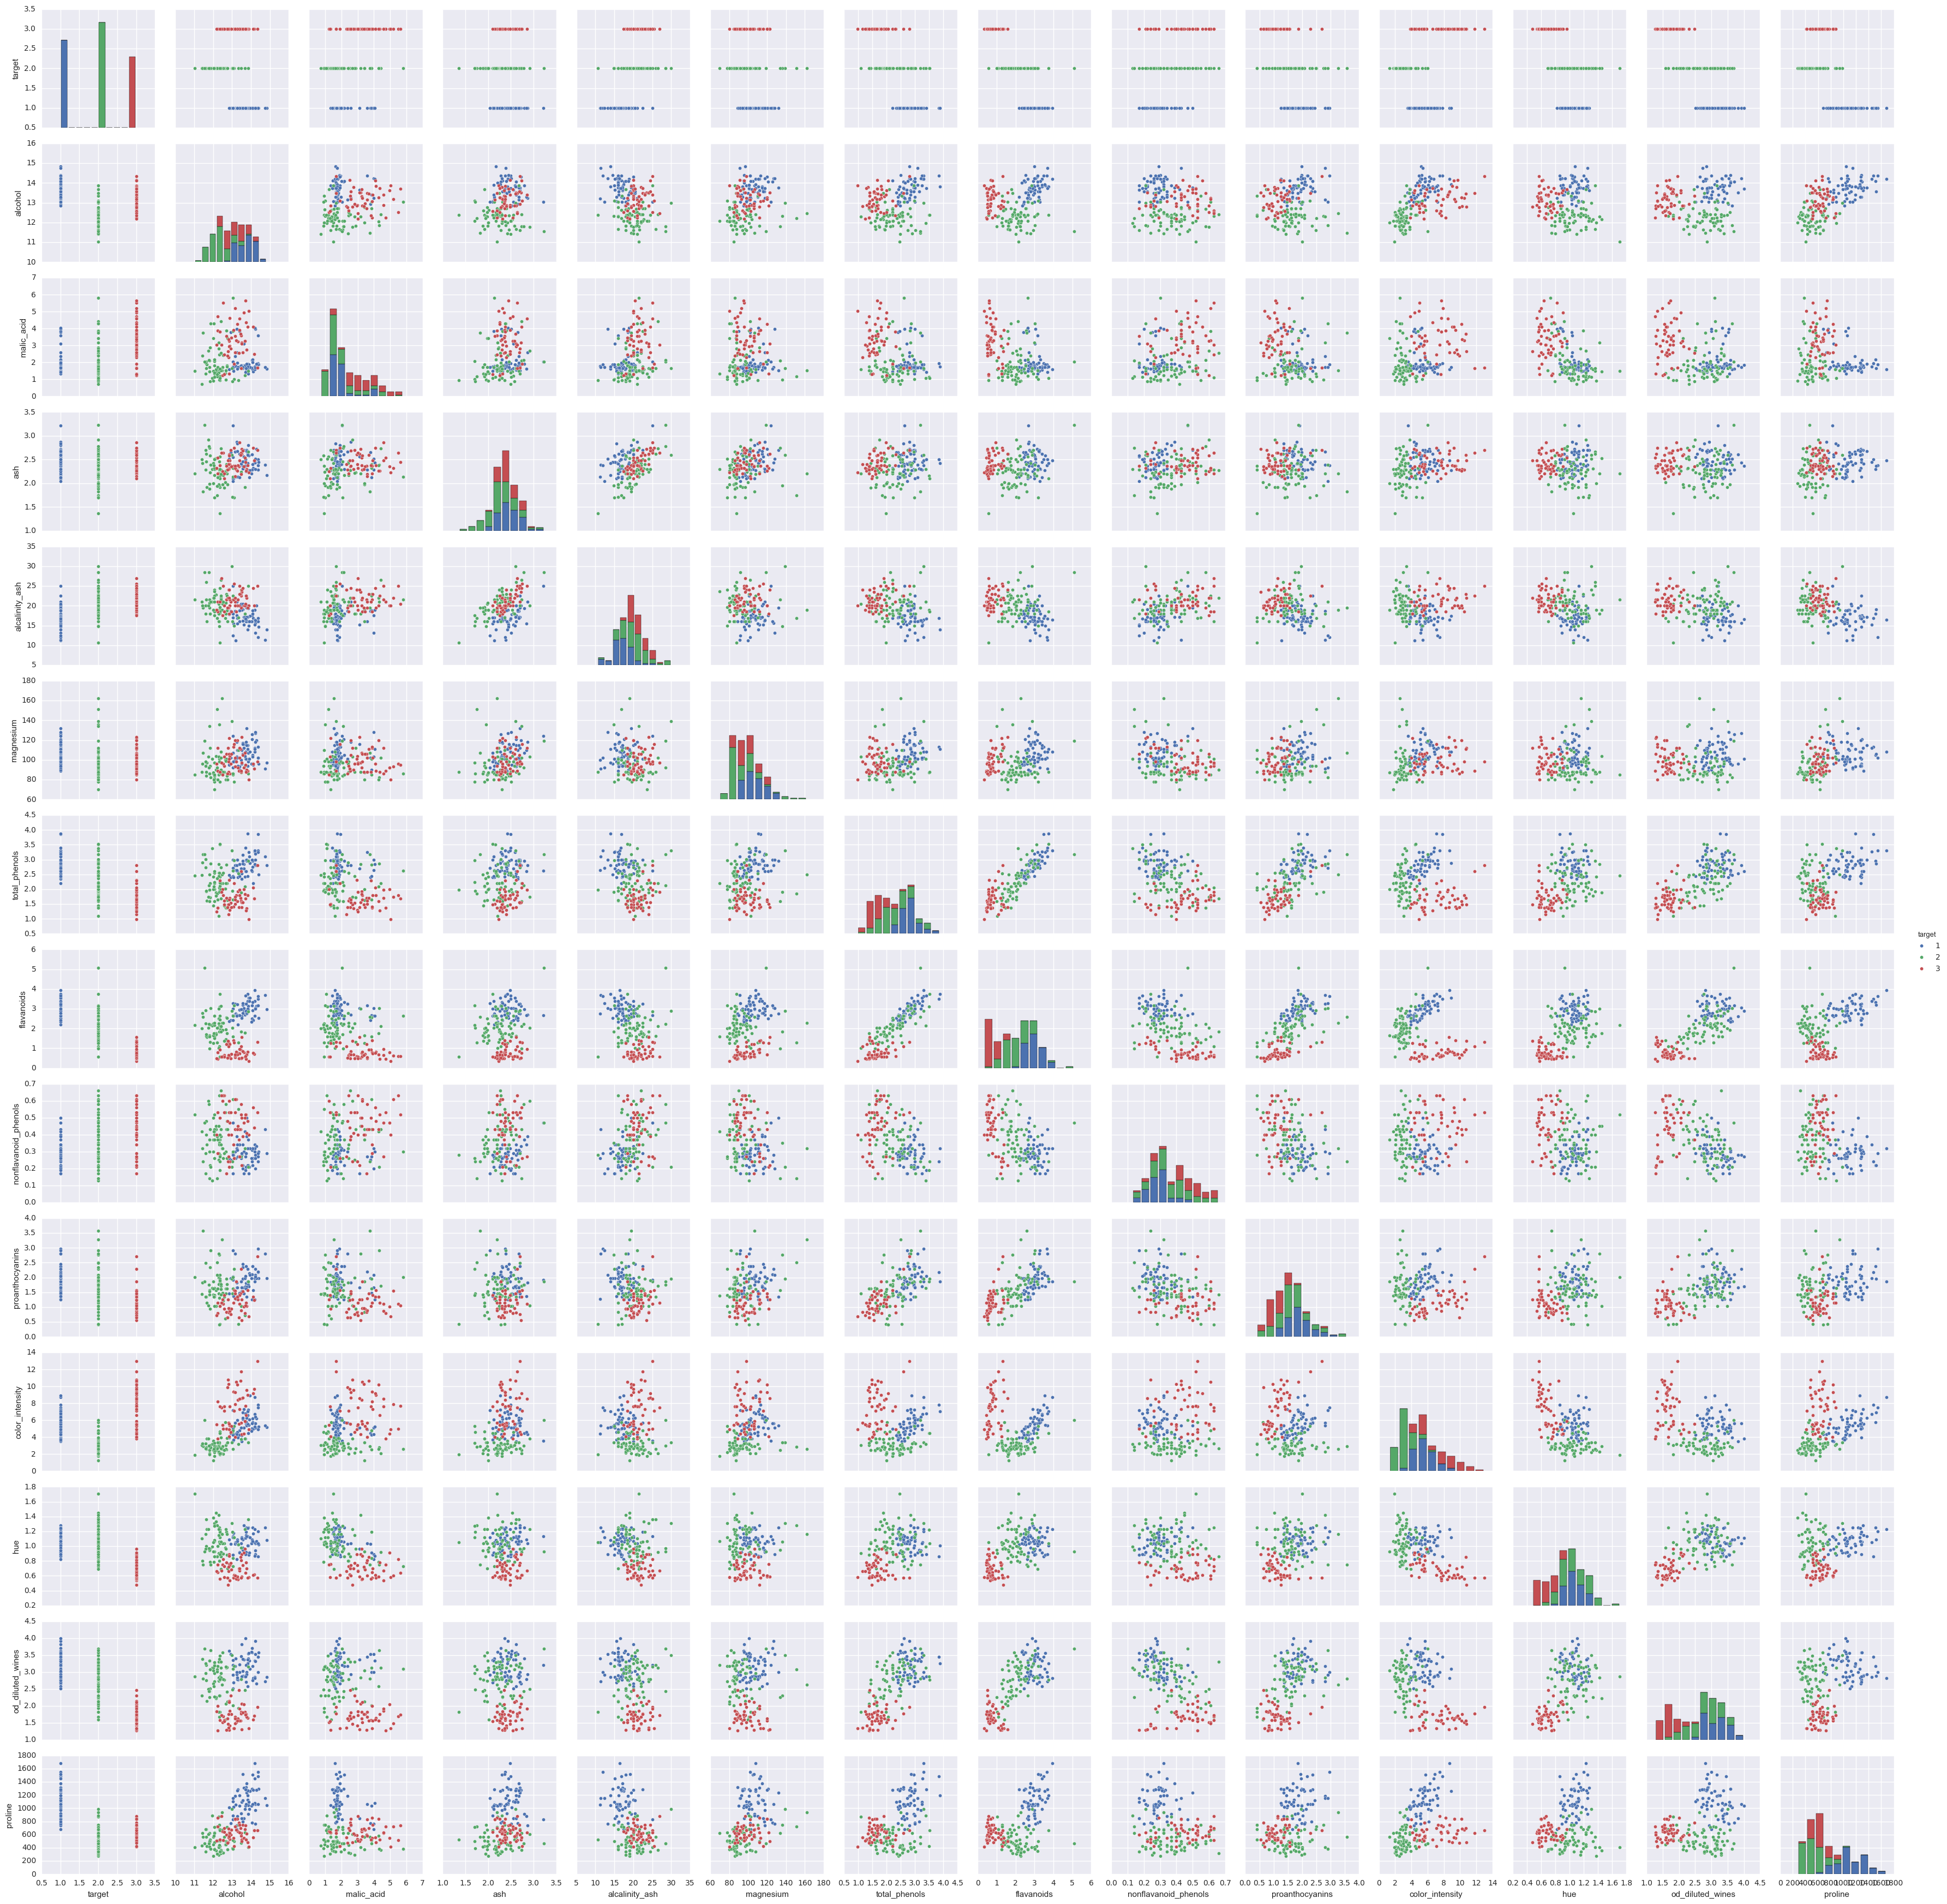

In [29]:
sns.pairplot(df, hue='target')
plt.show()

Налицо ряд признаков, имеющих положительную или отрицательную линейные связи. По некоторым диаграммам рассеяния можно предположить, что классы "почти" линейно разделимы. Есть распределения с тяжелыми хвостами. Посчитаем численные коэффициенты корреляции.

In [30]:
df.corr()

,target,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od_diluted_wines,proline
target,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


Действительно, некоторые значения достигают 0.86 по модулю - это очень сильная заявка на регуляризацию в линейной модели

## Часть 1

Разобьем выборку случайным образом, зафиксировав seed, на обучаюшую и тестовую в соотношении 70:30

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[[x for x in df.columns if x!='target']], 
                                                    df['target'], test_size=0.3, random_state=42)

## Часть 2.1

С помощью функции StratifiedKFold разобьем обучающую выборку на 10 сбалансированных фолдов и вернем генератор индексов. Зададим сетки параметров и будем обучать алгоритмы с помощью цикла по сетке.

In [115]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf_iter = skf.split(X_train, y_train)
print(skf_iter)

<generator object _BaseKFold.split at 0x113da65c8>


Напишем функции, осуществляющие подсчет средних ошибок kNN, числа опорных векторов, ошибки для SVM, случайного леса и нейронной сети

In [274]:
def grid_search_cv_knn(X, y, skf, param_list):
    param_score_train = []
    param_score_test = []
    for param in param_list:
        cv_train_score = []
        cv_test_score = []
        skf_iter = skf.split(X_train, y_train)
        for train_index, valid_index in skf_iter:
            model = KNeighborsClassifier(n_neighbors=param)
            model.fit(X[train_index], y[train_index])
            score_train = 1 - model.score(X[train_index], y[train_index])
            score_test = 1 - model.score(X[valid_index], y[valid_index])
            cv_train_score.append(score_train)
            cv_test_score.append(score_test)
        param_score_train.append(np.mean(cv_train_score))
        param_score_test.append(np.mean(cv_test_score))
    return param_score_train, param_score_test

In [275]:
def grid_search_cv_svm(X, y, skf, param_list):
    param_iter = itertools.product(*param_list)
    
    n_vectors_c1 = []
    n_vectors_c2 = []
    n_vectors_c3 = []
    for cost in param_list[0]:
        model = SVC(C=cost)
        model.fit(X, y)
        n_vectors_c1.append(model.n_support_[0])
        n_vectors_c2.append(model.n_support_[1])
        n_vectors_c3.append(model.n_support_[2])
    
    errors_dict = {'Parameters': [], 'Cost value': [], 
                   'Kernel type': [], 'Error rate train': [], 
                  'Error rate test': []}
    for cost, kernel in param_iter:
        cv_train_score = []
        cv_test_score = []
        skf_iter = skf.split(X_train, y_train)
        for train_index, valid_index in skf_iter:
            model = SVC(C=cost, kernel=kernel)
            model.fit(X[train_index], y[train_index])
            score_train = 1 - model.score(X[train_index], y[train_index])
            score_test = 1 - model.score(X[valid_index], y[valid_index])
            cv_train_score.append(score_train)
            cv_test_score.append(score_test)
        errors_dict['Parameters'].append(str(cost)+'+'+kernel)
        errors_dict['Cost value'].append(cost)
        errors_dict['Kernel type'].append(kernel)
        errors_dict['Error rate train'].append(np.mean(cv_train_score))
        errors_dict['Error rate test'].append(np.mean(cv_test_score))
    return n_vectors_c1, n_vectors_c2, n_vectors_c3, errors_dict

Для оставшихся решающих деревьев, нейронной сети и случайного леса воспользуемся готовым решением поиска оптимальных параметров по сетке из sklearn

In [276]:
def grid_search_cv(X, y, skf, param_list, model):
    gs_cv = GridSearchCV(estimator=model, param_grid=param_list, cv=skf, scoring='accuracy')
    gs_cv.fit(X, y)
    return gs_cv

## Часть 2.2

Далее нарисуем графики ошибок для К ближайших соседей, предварительно задав список возможного числа соседей

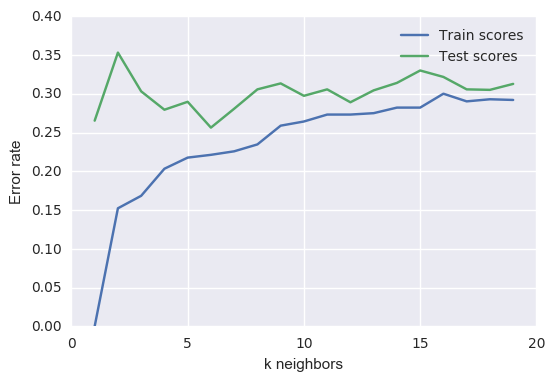

In [133]:
knn_params = range(1, 20)
train_scores, test_scores = grid_search_cv_knn(X_train.values, y_train.values, skf, knn_params)
plt.plot(knn_params, train_scores, label='Train scores')
plt.plot(knn_params, test_scores, label='Test scores')
plt.xlabel('k neighbors')
plt.ylabel('Error rate')
plt.legend(loc='best')
plt.show()

Зададим сетку из параметров штрафа и типов ядра. Написанная выше функция производит декартово произведение двух листок и обходит все возможные пары в поиске

In [139]:
svm_params = [[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 1.2, 1.5, 1.7, 2], 
             ['linear', 'rbf', 'sigmoid']]
n_v_1, n_v_2, n_v_3, table_svm = grid_search_cv_svm(X_train.values, y_train.values, skf, svm_params)

## Часть 2.3

Нарисуем зависимость числа векторов от значений штрафа

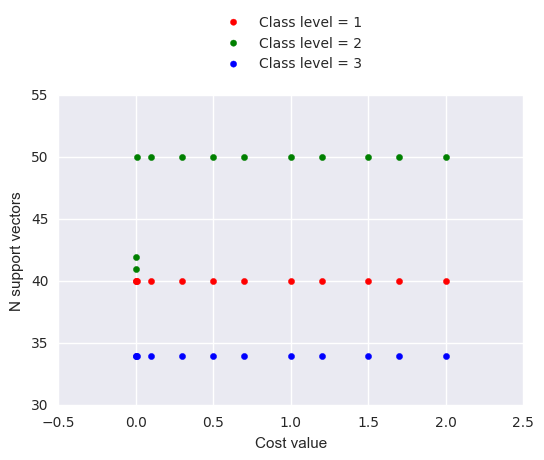

In [155]:
plt.scatter(svm_params[0], n_v_1, label='Class level = 1', color='red')
plt.scatter(svm_params[0], n_v_2, label='Class level = 2', color='green')
plt.scatter(svm_params[0], n_v_3, label='Class level = 3', color='blue')
plt.xlabel('Cost value')
plt.ylabel('N support vectors')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

## Часть 2.4

Для удобства сделаем из полученного словаря таблицу всех получившихся svm классификаторов со значениями ошибок на кросс валидации

In [156]:
pd.DataFrame(table_svm)

,Cost value,Error rate test,Error rate train,Kernel type,Parameters
0,0.0001,0.298077,0.286744,linear,0.0001+linear
1,0.0001,0.596154,0.596766,rbf,0.0001+rbf
2,0.0001,0.596154,0.596766,sigmoid,0.0001+sigmoid
3,0.0010,0.241667,0.222241,linear,0.001+linear
4,0.0010,0.596154,0.596766,rbf,0.001+rbf
5,0.0010,0.596154,0.596766,sigmoid,0.001+sigmoid
6,0.0100,0.113462,0.060047,linear,0.01+linear
7,0.0100,0.596154,0.596766,rbf,0.01+rbf
8,0.0100,0.596154,0.596766,sigmoid,0.01+sigmoid
9,0.1000,0.064744,0.035835,linear,0.1+linear


In [176]:
trees_params = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 8, 10, 13, None], 
                'min_samples_leaf': [1, 4, 8]}
gs_cv = grid_search_cv(X_test, y_test, skf, trees_params, DecisionTreeClassifier())

In [234]:
pd.DataFrame(gs_cv.cv_results_).columns
tree_table = pd.DataFrame(gs_res)[['mean_test_score', 'mean_train_score', 'params']]
tree_table['cv_error_rate_test'] = 1 - tree_table['mean_test_score']
tree_table['cv_error_rate_train'] = 1 - tree_table['mean_train_score']
del tree_table['mean_test_score']
del tree_table['mean_train_score']
tree_table

,params,cv_error_rate_test,cv_error_rate_train
0,"{'min_samples_leaf': 1, 'max_depth': 3, 'crite...",0.111111,0.000000
1,"{'min_samples_leaf': 4, 'max_depth': 3, 'crite...",0.148148,0.034999
2,"{'min_samples_leaf': 8, 'max_depth': 3, 'crite...",0.185185,0.034999
3,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",0.111111,0.000000
4,"{'min_samples_leaf': 4, 'max_depth': 4, 'crite...",0.148148,0.034999
5,"{'min_samples_leaf': 8, 'max_depth': 4, 'crite...",0.185185,0.034999
6,"{'min_samples_leaf': 1, 'max_depth': 5, 'crite...",0.111111,0.000000
7,"{'min_samples_leaf': 4, 'max_depth': 5, 'crite...",0.148148,0.034999
8,"{'min_samples_leaf': 8, 'max_depth': 5, 'crite...",0.185185,0.034999
9,"{'min_samples_leaf': 1, 'max_depth': 8, 'crite...",0.092593,0.000000


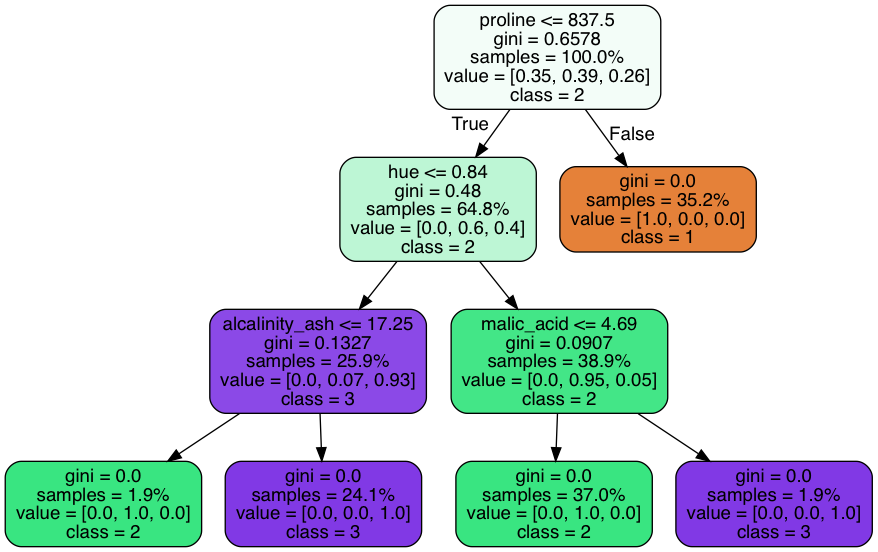

In [190]:
from IPython.display import Image
import pydotplus
f_list = [x for x in df.columns if x!='target']
dot_data = export_graphviz(gs_cv.best_estimator_, out_file=None, filled=True, rounded=True, feature_names=f_list, 
                           class_names=['1', '2', '3'], proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [247]:
nn_params = {'hidden_layer_sizes': [(3,), (5,), (4, 3), (4, 4)], 'activation': ['logistic', 'tanh'], 
             'solver': ['lbfgs'], 'alpha': [0.0001, 0.01, 0.1], 'random_state': [42]}
gs_cv = grid_search_cv(X_test, y_test, skf, nn_params, MLPClassifier())

In [248]:
nn_table = pd.DataFrame(gs_cv.cv_results_)[['mean_test_score', 'mean_train_score', 'params']]
nn_table['cv_error_rate_test'] = 1 - nn_table['mean_test_score']
nn_table['cv_error_rate_train'] = 1 - nn_table['mean_train_score']
del nn_table['mean_test_score']
del nn_table['mean_train_score']
nn_table

,params,cv_error_rate_test,cv_error_rate_train
0,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.611111,0.611075
1,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.611111,0.611075
2,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.574074,0.578422
3,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.611111,0.611075
4,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.277778,0.230525
5,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.296296,0.227284
6,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.277778,0.234304
7,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.481481,0.455180
8,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.240741,0.221798
9,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.185185,0.217111


In [217]:
rf_params = {'n_estimators': [10, 30, 50, 100, 150], 'max_depth': [5, 7, None], 'random_state': [42]}
gs_cv = grid_search_cv(X_test, y_test, skf, rf_params, RandomForestClassifier())

In [232]:
rf_table = pd.DataFrame(gs_cv.cv_results_)[['mean_test_score', 'mean_train_score', 'params']]
rf_table['cv_error_rate_test'] = 1 - rf_table['mean_test_score']
rf_table['cv_error_rate_train'] = 1 - rf_table['mean_train_score']
del rf_table['mean_test_score']
del rf_table['mean_train_score']
rf_table

,params,cv_error_rate_test,cv_error_rate_train
0,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.055556,0.0
1,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.000000,0.0
2,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.037037,0.0
3,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.000000,0.0
4,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.000000,0.0
5,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.055556,0.0
6,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.000000,0.0
7,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.037037,0.0
8,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.000000,0.0
9,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.000000,0.0


## Часть 2.5

Обучим все методы на тех же сетках и составим таблицы ошибок

Для kNN

In [236]:
full_knn = KNeighborsClassifier(n_neighbors=6)
full_knn.fit(X_train, y_train)
full_knn_score_train = 1 - full_knn.score(X_train, y_train)
full_knn_score_test = 1 - full_knn.score(X_test, y_test)
print('kNN train error rate: {} \n kNN test error rate: {}'.format(full_knn_score_train, full_knn_score_test))

kNN train error rate: 0.22580645161290325 
 kNN test error rate: 0.2962962962962963


Для svm

In [291]:
def grid_search_svm(X_train, y_train, X_test, y_test, param_list):
    param_iter = itertools.product(*param_list)
    
    errors_dict = {'Parameters': [], 'Cost value': [], 
                   'Kernel type': [], 'Error rate train': [], 
                  'Error rate test': []}
    
    for cost, kernel in param_iter:
        model = SVC(C=cost, kernel=kernel)
        model.fit(X_train, y_train)
        score_train = 1 - model.score(X_train, y_train)
        score_test = 1 - model.score(X_test, y_test)
        errors_dict['Parameters'].append(str(cost)+'+'+kernel)
        errors_dict['Cost value'].append(cost)
        errors_dict['Kernel type'].append(kernel)
        errors_dict['Error rate train'].append(score_train)
        errors_dict['Error rate test'].append(score_test)
    return errors_dict

In [240]:
svm_table_full = grid_search_svm(X_train, y_train, X_test, y_test, svm_params)
pd.DataFrame(svm_table_full)

,Cost value,Error rate test,Error rate train,Kernel type,Parameters
0,0.0001,0.296296,0.282258,linear,0.0001+linear
1,0.0001,0.611111,0.596774,rbf,0.0001+rbf
2,0.0001,0.611111,0.596774,sigmoid,0.0001+sigmoid
3,0.0010,0.092593,0.201613,linear,0.001+linear
4,0.0010,0.611111,0.596774,rbf,0.001+rbf
5,0.0010,0.611111,0.596774,sigmoid,0.001+sigmoid
6,0.0100,0.000000,0.048387,linear,0.01+linear
7,0.0100,0.611111,0.596774,rbf,0.01+rbf
8,0.0100,0.611111,0.596774,sigmoid,0.01+sigmoid
9,0.1000,0.000000,0.040323,linear,0.1+linear


Для дерева решений

In [293]:
def grid_search_tree(X_train, y_train, X_test, y_test, param_list):
    param_iter = itertools.product(*param_list)
    
    errors_dict = {'Parameters': [], 'Error rate train': [], 
                  'Error rate test': []}
    max_error = 1
    for criterion, max_depth, min_samples_leaf in param_iter:
        model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                      min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)
        score_train = 1 - model.score(X_train, y_train)
        score_test = 1 - model.score(X_test, y_test)
        if score_test < max_error:
            max_error = score_test
            best_tree = model
        errors_dict['Parameters'].append(criterion+'+'+str(max_depth)+'+'+str(min_samples_leaf))
        errors_dict['Error rate train'].append(score_train)
        errors_dict['Error rate test'].append(score_test)
    return errors_dict, best_tree

In [271]:
tree_params = [['gini', 'entropy'], [3, 4, 5, 8, 10, 13, None], [1, 4, 8]]
tree_table_full, full_tree = grid_search_tree(X_train, y_train, X_test, y_test, tree_params)
pd.DataFrame(tree_table_full)

,Error rate test,Error rate train,Parameters
0,0.055556,0.008065,gini+3+1
1,0.055556,0.024194,gini+3+4
2,0.055556,0.032258,gini+3+8
3,0.055556,0.000000,gini+4+1
4,0.055556,0.024194,gini+4+4
5,0.055556,0.032258,gini+4+8
6,0.055556,0.000000,gini+5+1
7,0.055556,0.024194,gini+5+4
8,0.055556,0.032258,gini+5+8
9,0.055556,0.000000,gini+8+1


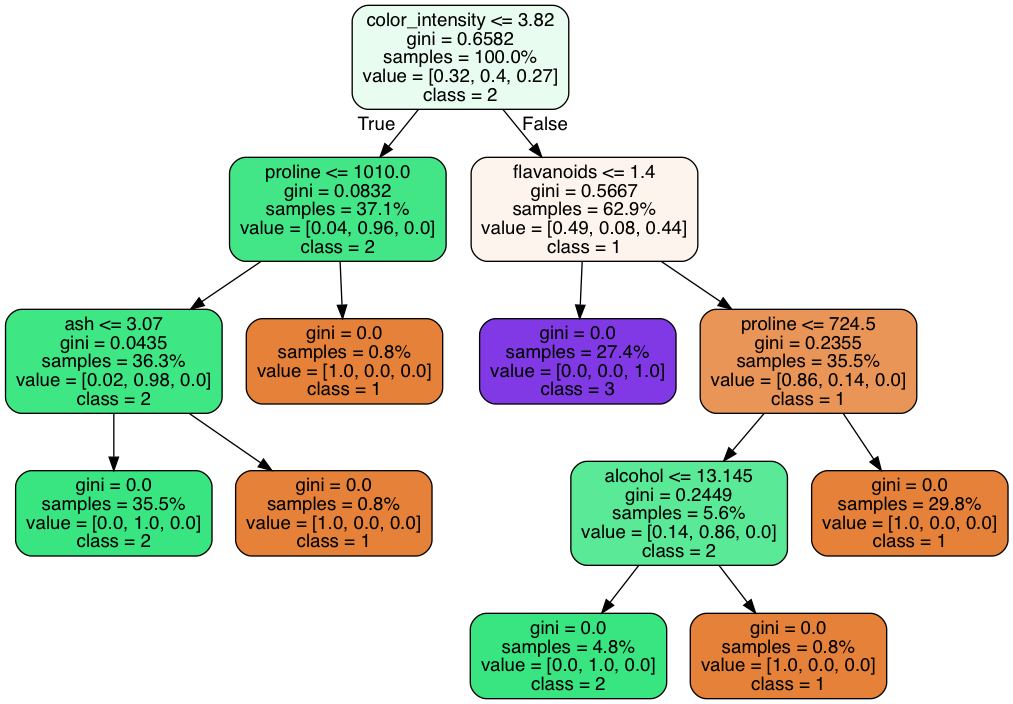

In [272]:
f_list = [x for x in df.columns if x!='target']
dot_data = export_graphviz(full_tree, out_file=None, filled=True, rounded=True, feature_names=f_list, 
                           class_names=['1', '2', '3'], proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Для нейронной сети

In [296]:
def grid_search_nn(X_train, y_train, X_test, y_test, param_list):
    param_iter = itertools.product(*param_list)
    
    errors_dict = {'Parameters': [], 'Error rate train': [], 
                  'Error rate test': []}
    
    for hidden_layer_sizes, activation, solver, alpha, random_state in param_iter:
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, 
                             solver=solver, alpha=alpha, random_state=random_state)
        model.fit(X_train, y_train)
        score_train = 1 - model.score(X_train, y_train)
        score_test = 1 - model.score(X_test, y_test)
        errors_dict['Parameters'].append(str(hidden_layer_sizes)+
                                         '+'+activation+'+'+solver+'+'+str(alpha)+
                                        '+'+str(random_state))
        errors_dict['Error rate train'].append(score_train)
        errors_dict['Error rate test'].append(score_test)
    return errors_dict

In [252]:
nn_params = [[(3,), (5,), (4, 3), (4, 4)], ['logistic', 'tanh'], 
             ['lbfgs'], [0.0001, 0.01, 0.1], [42]]
nn_table_full = grid_search_nn(X_train, y_train, X_test, y_test, nn_params)
pd.DataFrame(nn_table_full)

,Error rate test,Error rate train,Parameters
0,0.611111,0.596774,"(3,)+logistic+lbfgs+0.0001+42"
1,0.611111,0.596774,"(3,)+logistic+lbfgs+0.01+42"
2,0.055556,0.185484,"(3,)+logistic+lbfgs+0.1+42"
3,0.611111,0.596774,"(3,)+tanh+lbfgs+0.0001+42"
4,0.611111,0.596774,"(3,)+tanh+lbfgs+0.01+42"
5,0.296296,0.322581,"(3,)+tanh+lbfgs+0.1+42"
6,0.611111,0.596774,"(5,)+logistic+lbfgs+0.0001+42"
7,0.611111,0.596774,"(5,)+logistic+lbfgs+0.01+42"
8,0.092593,0.161290,"(5,)+logistic+lbfgs+0.1+42"
9,0.611111,0.596774,"(5,)+tanh+lbfgs+0.0001+42"


Для случайного леса

In [298]:
def grid_search_rf(X_train, y_train, X_test, y_test, param_list):
    param_iter = itertools.product(*param_list)
    
    errors_dict = {'Parameters': [], 'Error rate train': [], 
                  'Error rate test': []}
    
    for n_estimators, max_depth, random_state in param_iter:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                      random_state=random_state)
        model.fit(X_train, y_train)
        score_train = 1 - model.score(X_train, y_train)
        score_test = 1 - model.score(X_test, y_test)
        errors_dict['Parameters'].append(str(n_estimators)+'+'+str(max_depth)+'+'+str(random_state))
        errors_dict['Error rate train'].append(score_train)
        errors_dict['Error rate test'].append(score_test)
    return errors_dict

In [259]:
rf_params = [[10, 30, 50, 100, 150], [5, 7, None], [42]]
rf_table_full = grid_search_rf(X_train, y_train, X_test, y_test, rf_params)
pd.DataFrame(rf_table_full)

,Error rate test,Error rate train,Parameters
0,0.074074,0.0,10+5+42
1,0.074074,0.0,10+7+42
2,0.074074,0.0,10+None+42
3,0.018519,0.0,30+5+42
4,0.018519,0.0,30+7+42
5,0.018519,0.0,30+None+42
6,0.000000,0.0,50+5+42
7,0.000000,0.0,50+7+42
8,0.000000,0.0,50+None+42
9,0.000000,0.0,100+5+42


Наилучшие результаты показал случайный лес №6, правильно классифицирующий все вина из обучающей и тестовой выборок. SVM №6 с линейным ядром также показал нулевые ошибки на тестовой выборке.

## Часть 3

Повторим все для нормированной выборки. Ожидаем, что дерево и лес покажут такие же результаты, так как они не чувствительны к масштабу, а от всех остальных алгоритмов ожидаем улучшение прогноза. В алгоритме ближайших соседей используется евклидово расстояние, которое реагирует на масштаб, который может помешать адекватно обучать модель; расстояния до разделяющей границы в svm тоже зависят от масштаба; веса в нейронах многослойного перцептрона тоже очень чувствительны к масштабу входных данных, так как в каждом из них работу выполняет обобщенная линейная модель.

In [273]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

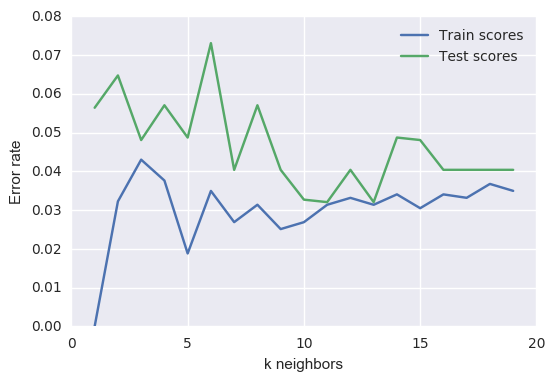

In [278]:
knn_params = range(1, 20)
train_scores, test_scores = grid_search_cv_knn(X_train, y_train.values, skf, knn_params)
plt.plot(knn_params, train_scores, label='Train scores')
plt.plot(knn_params, test_scores, label='Test scores')
plt.xlabel('k neighbors')
plt.ylabel('Error rate')
plt.legend(loc='best')
plt.show()

In [280]:
svm_params = [[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 1.2, 1.5, 1.7, 2], 
             ['linear', 'rbf', 'sigmoid']]
n_v_1, n_v_2, n_v_3, table_svm = grid_search_cv_svm(X_train, y_train.values, skf, svm_params)

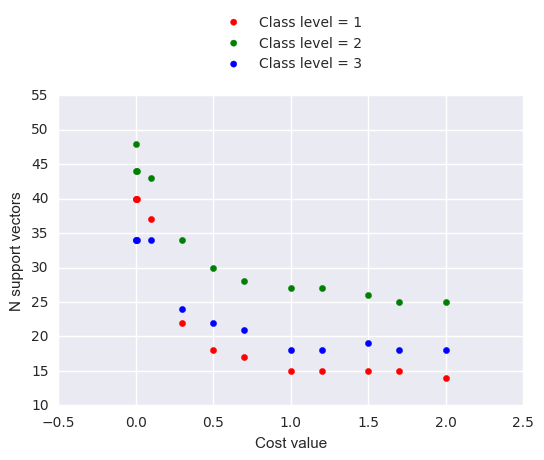

In [281]:
plt.scatter(svm_params[0], n_v_1, label='Class level = 1', color='red')
plt.scatter(svm_params[0], n_v_2, label='Class level = 2', color='green')
plt.scatter(svm_params[0], n_v_3, label='Class level = 3', color='blue')
plt.xlabel('Cost value')
plt.ylabel('N support vectors')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [282]:
pd.DataFrame(table_svm)

,Cost value,Error rate test,Error rate train,Kernel type,Parameters
0,0.0001,0.596154,0.596766,linear,0.0001+linear
1,0.0001,0.596154,0.596766,rbf,0.0001+rbf
2,0.0001,0.596154,0.596766,sigmoid,0.0001+sigmoid
3,0.0010,0.596154,0.596766,linear,0.001+linear
4,0.0010,0.596154,0.596766,rbf,0.001+rbf
5,0.0010,0.596154,0.596766,sigmoid,0.001+sigmoid
6,0.0100,0.023718,0.018806,linear,0.01+linear
7,0.0100,0.596154,0.596766,rbf,0.01+rbf
8,0.0100,0.596154,0.596766,sigmoid,0.01+sigmoid
9,0.1000,0.039744,0.008068,linear,0.1+linear


In [283]:
trees_params = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 8, 10, 13, None], 
                'min_samples_leaf': [1, 4, 8]}
gs_cv = grid_search_cv(X_test, y_test, skf, trees_params, DecisionTreeClassifier())

In [284]:
pd.DataFrame(gs_cv.cv_results_).columns
tree_table = pd.DataFrame(gs_res)[['mean_test_score', 'mean_train_score', 'params']]
tree_table['cv_error_rate_test'] = 1 - tree_table['mean_test_score']
tree_table['cv_error_rate_train'] = 1 - tree_table['mean_train_score']
del tree_table['mean_test_score']
del tree_table['mean_train_score']
tree_table

,params,cv_error_rate_test,cv_error_rate_train
0,"{'min_samples_leaf': 1, 'max_depth': 3, 'crite...",0.111111,0.000000
1,"{'min_samples_leaf': 4, 'max_depth': 3, 'crite...",0.148148,0.034999
2,"{'min_samples_leaf': 8, 'max_depth': 3, 'crite...",0.185185,0.034999
3,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",0.111111,0.000000
4,"{'min_samples_leaf': 4, 'max_depth': 4, 'crite...",0.148148,0.034999
5,"{'min_samples_leaf': 8, 'max_depth': 4, 'crite...",0.185185,0.034999
6,"{'min_samples_leaf': 1, 'max_depth': 5, 'crite...",0.111111,0.000000
7,"{'min_samples_leaf': 4, 'max_depth': 5, 'crite...",0.148148,0.034999
8,"{'min_samples_leaf': 8, 'max_depth': 5, 'crite...",0.185185,0.034999
9,"{'min_samples_leaf': 1, 'max_depth': 8, 'crite...",0.092593,0.000000


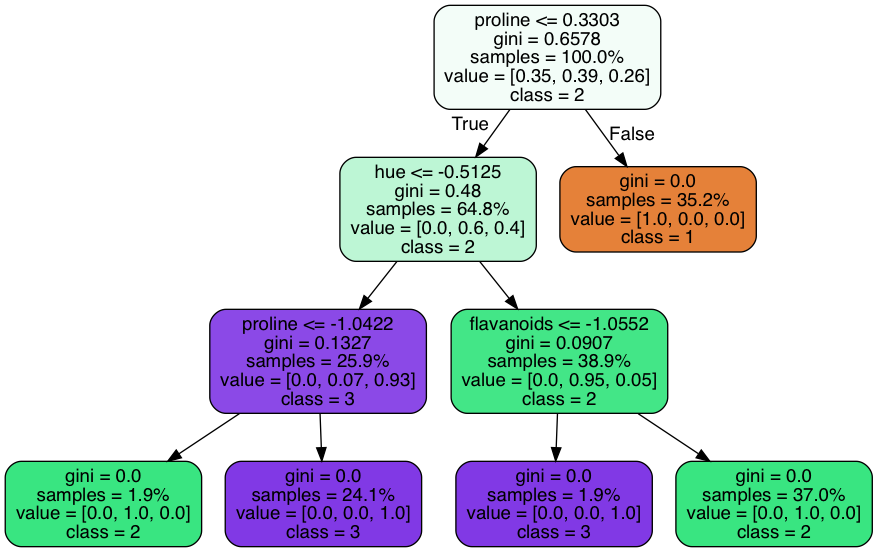

In [285]:
f_list = [x for x in df.columns if x!='target']
dot_data = export_graphviz(gs_cv.best_estimator_, out_file=None, filled=True, rounded=True, feature_names=f_list, 
                           class_names=['1', '2', '3'], proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [286]:
nn_params = {'hidden_layer_sizes': [(3,), (5,), (4, 3), (4, 4)], 'activation': ['logistic', 'tanh'], 
             'solver': ['lbfgs'], 'alpha': [0.0001, 0.01, 0.1], 'random_state': [42]}
gs_cv = grid_search_cv(X_test, y_test, skf, nn_params, MLPClassifier())

In [287]:
nn_table = pd.DataFrame(gs_cv.cv_results_)[['mean_test_score', 'mean_train_score', 'params']]
nn_table['cv_error_rate_test'] = 1 - nn_table['mean_test_score']
nn_table['cv_error_rate_train'] = 1 - nn_table['mean_train_score']
del nn_table['mean_test_score']
del nn_table['mean_train_score']
nn_table

,params,cv_error_rate_test,cv_error_rate_train
0,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.018519,0.0
1,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.037037,0.0
2,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.074074,0.0
3,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.037037,0.0
4,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.018519,0.0
5,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.037037,0.0
6,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.018519,0.0
7,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.018519,0.0
8,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.018519,0.0
9,"{'random_state': 42, 'solver': 'lbfgs', 'hidde...",0.018519,0.0


In [288]:
rf_params = {'n_estimators': [10, 30, 50, 100, 150], 'max_depth': [5, 7, None], 'random_state': [42]}
gs_cv = grid_search_cv(X_test, y_test, skf, rf_params, RandomForestClassifier())

In [289]:
rf_table = pd.DataFrame(gs_cv.cv_results_)[['mean_test_score', 'mean_train_score', 'params']]
rf_table['cv_error_rate_test'] = 1 - rf_table['mean_test_score']
rf_table['cv_error_rate_train'] = 1 - rf_table['mean_train_score']
del rf_table['mean_test_score']
del rf_table['mean_train_score']
rf_table

,params,cv_error_rate_test,cv_error_rate_train
0,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.055556,0.0
1,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.000000,0.0
2,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.037037,0.0
3,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.000000,0.0
4,"{'random_state': 42, 'max_depth': 5, 'n_estima...",0.000000,0.0
5,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.055556,0.0
6,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.000000,0.0
7,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.037037,0.0
8,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.000000,0.0
9,"{'random_state': 42, 'max_depth': 7, 'n_estima...",0.000000,0.0


### Для полных выборок

In [290]:
full_knn = KNeighborsClassifier(n_neighbors=13)
full_knn.fit(X_train, y_train)
full_knn_score_train = 1 - full_knn.score(X_train, y_train)
full_knn_score_test = 1 - full_knn.score(X_test, y_test)
print('kNN train error rate: {} \n kNN test error rate: {}'.format(full_knn_score_train, full_knn_score_test))

kNN train error rate: 0.024193548387096753 
 kNN test error rate: 0.03703703703703709


In [292]:
svm_table_full = grid_search_svm(X_train, y_train, X_test, y_test, svm_params)
pd.DataFrame(svm_table_full)

,Cost value,Error rate test,Error rate train,Kernel type,Parameters
0,0.0001,0.611111,0.596774,linear,0.0001+linear
1,0.0001,0.611111,0.596774,rbf,0.0001+rbf
2,0.0001,0.611111,0.596774,sigmoid,0.0001+sigmoid
3,0.0010,0.611111,0.596774,linear,0.001+linear
4,0.0010,0.611111,0.596774,rbf,0.001+rbf
5,0.0010,0.611111,0.596774,sigmoid,0.001+sigmoid
6,0.0100,0.000000,0.016129,linear,0.01+linear
7,0.0100,0.611111,0.596774,rbf,0.01+rbf
8,0.0100,0.611111,0.596774,sigmoid,0.01+sigmoid
9,0.1000,0.018519,0.008065,linear,0.1+linear


In [294]:
tree_params = [['gini', 'entropy'], [3, 4, 5, 8, 10, 13, None], [1, 4, 8]]
tree_table_full, full_tree = grid_search_tree(X_train, y_train, X_test, y_test, tree_params)
pd.DataFrame(tree_table_full)

,Error rate test,Error rate train,Parameters
0,0.037037,0.008065,gini+3+1
1,0.055556,0.024194,gini+3+4
2,0.055556,0.032258,gini+3+8
3,0.037037,0.000000,gini+4+1
4,0.055556,0.024194,gini+4+4
5,0.055556,0.032258,gini+4+8
6,0.055556,0.000000,gini+5+1
7,0.055556,0.024194,gini+5+4
8,0.055556,0.032258,gini+5+8
9,0.037037,0.000000,gini+8+1


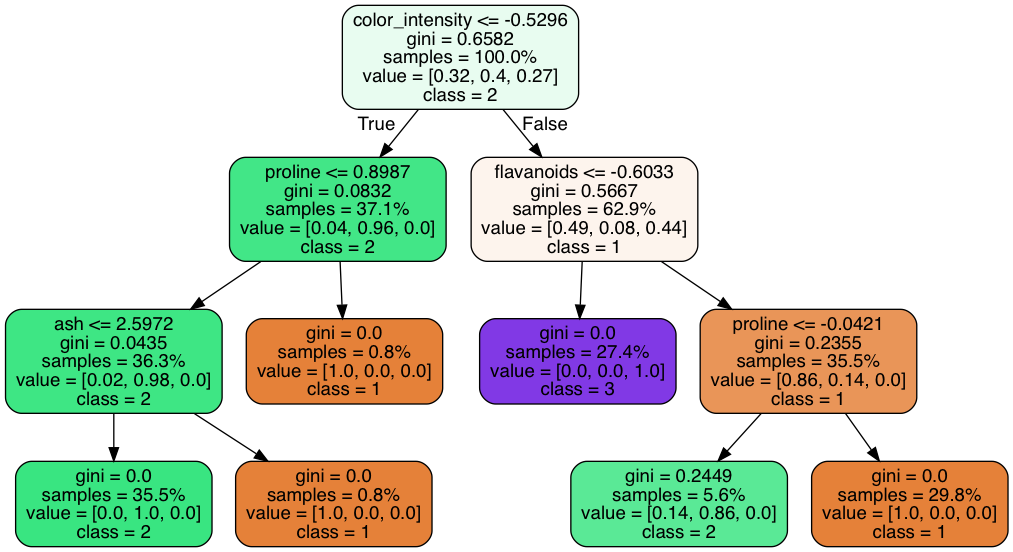

In [295]:
f_list = [x for x in df.columns if x!='target']
dot_data = export_graphviz(full_tree, out_file=None, filled=True, rounded=True, feature_names=f_list, 
                           class_names=['1', '2', '3'], proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [297]:
nn_params = [[(3,), (5,), (4, 3), (4, 4)], ['logistic', 'tanh'], 
             ['lbfgs'], [0.0001, 0.01, 0.1], [42]]
nn_table_full = grid_search_nn(X_train, y_train, X_test, y_test, nn_params)
pd.DataFrame(nn_table_full)

,Error rate test,Error rate train,Parameters
0,0.037037,0.0,"(3,)+logistic+lbfgs+0.0001+42"
1,0.018519,0.0,"(3,)+logistic+lbfgs+0.01+42"
2,0.018519,0.0,"(3,)+logistic+lbfgs+0.1+42"
3,0.018519,0.0,"(3,)+tanh+lbfgs+0.0001+42"
4,0.018519,0.0,"(3,)+tanh+lbfgs+0.01+42"
5,0.018519,0.0,"(3,)+tanh+lbfgs+0.1+42"
6,0.018519,0.0,"(5,)+logistic+lbfgs+0.0001+42"
7,0.018519,0.0,"(5,)+logistic+lbfgs+0.01+42"
8,0.018519,0.0,"(5,)+logistic+lbfgs+0.1+42"
9,0.018519,0.0,"(5,)+tanh+lbfgs+0.0001+42"


In [299]:
rf_params = [[10, 30, 50, 100, 150], [5, 7, None], [42]]
rf_table_full = grid_search_rf(X_train, y_train, X_test, y_test, rf_params)
pd.DataFrame(rf_table_full)

,Error rate test,Error rate train,Parameters
0,0.074074,0.0,10+5+42
1,0.074074,0.0,10+7+42
2,0.074074,0.0,10+None+42
3,0.018519,0.0,30+5+42
4,0.018519,0.0,30+7+42
5,0.018519,0.0,30+None+42
6,0.000000,0.0,50+5+42
7,0.000000,0.0,50+7+42
8,0.000000,0.0,50+None+42
9,0.000000,0.0,100+5+42


Как и ожидалось, после нормирования дерево и лес показали такие же результаты, зато для многослойного перцептрона, svm и knn налицо явное улучшение результатов. Среди моделей-кандидатов многослойных перцептронов и svm появилась такая, которая правильно классифицирует 100% наблюдений в обучающей и тестовых выборках и тестовой выборке соответственно. С другой стороны, среди перцептронов и svm нет таких, которые бы показали 100% результат по кросс-валидационным результатам. Поэтому лучшая модель среди всех - случайный лес, для которого можно наблюдать 100% результаты на кросс-валидации и тестовой выборке. Например, лес №6 не имеет ошибок в обоих случаях